### example of how to read data and plot baryonic Tully-Fisher relation

Data files required for the plotting script below  can be found <a href="http://astro.uchicago.edu/~andrey/classes/a304s18/data/">here</a>

In [2]:
# setup notebook for inline figures
%matplotlib inline
import numpy as np

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
plot_pretty()

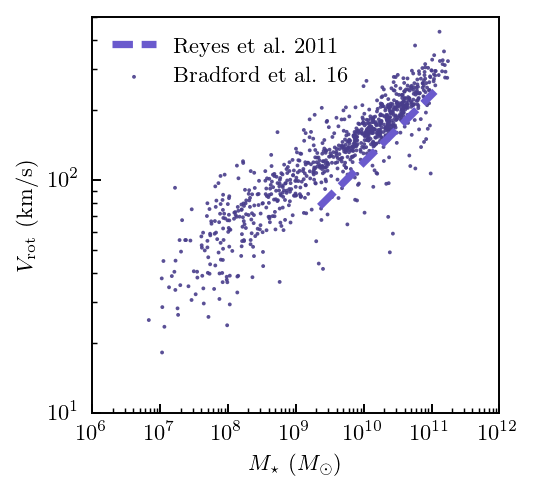

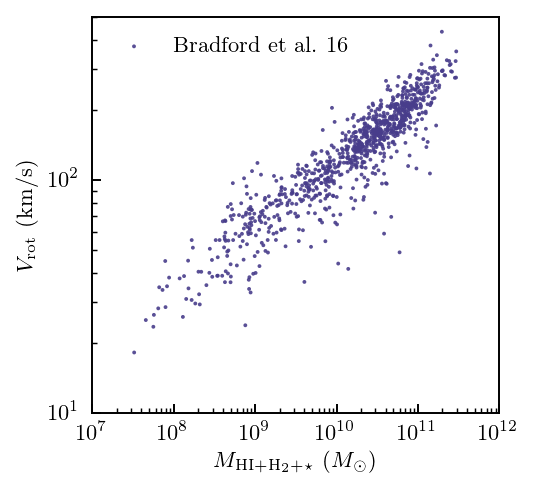

In [12]:
import pyfits
from code.setup.setup import data_home_dir

bf1 = pyfits.open(data_home_dir()+'figure_1_bradford_2016.fits')[1].data
# if you want to see what's in the fits table, uncomment
bf1h = pyfits.open('data/figure_1_bradford_2016.fits')[1].header
#print(bf1h)

mbbar = bf1['MBARYON']; embar = bf1['MBARYON_ERR']
w20b = bf1['VW20I']; ew20b = bf1['VW20I_ERR']
mbs = bf1['MSTAR'];
mbbar += 0.1238 # He correction
# TFR: V_2.2-M*
# Reyes et al. 2011 best fit relation (Table 12)
lmss = np.linspace(9.3, 11., 50); mss = 10.**(lmss + 0.05) # Kroupa->Chabrier
lV22R = 2.5*0.116 * (lmss-10.102) + 2.12; V22R = 10.**lV22R

# TFR
plt.figure(figsize=(3.,3.))
plt.xscale('log'); plt.yscale('log')
plt.xlim([1.e6,1.e12]); plt.ylim([10.,500.])
plt.ylabel(r'$V_{\rm rot}\ \mathrm{(km/s)}$'); plt.xlabel(r'$M_{\rm \star}\ {(M_\odot)}$')
plt.scatter(10.**mbs,w20b,marker='.',c='darkslateblue',s=10.,alpha=0.9,edgecolor='none', label=r'$\mathrm{Bradford\ et\ al.\ 16}$')
plt.plot(mss,  V22R, '--', c='slateblue', lw=3.0, label=r'$\mathrm{Reyes\ et\ al.\ 2011}$')
plt.legend(frameon=False,loc='upper left', fontsize=9)
plt.show()

# BTFR
plt.figure(figsize=(3.,3.))
plt.xscale('log'); plt.yscale('log')
plt.xlim([1.e7,1.e12]); plt.ylim([10.,500.])
plt.ylabel(r'$V_{\rm rot}\ \mathrm{(km/s)}$'); plt.xlabel(r'$M_{\rm HI+H_2+\star}\ {(M_\odot)}$')
plt.scatter(10.**mbbar,w20b,marker='.',c='darkslateblue',s=10.,alpha=0.9,edgecolor='none', label=r'$\mathrm{Bradford\ et\ al.\ 16}$')
plt.legend(frameon=False,loc='upper left', fontsize=9)
plt.show()